### recover profile-bio

In [1]:
import pandas as pd

# Replace with your actual Excel file name
file_path = "recover_user_profiles.xlsx"

# Load the Excel file
recover_profile = pd.read_excel(file_path)

# Display the first 5 rows
print(recover_profile.head())

               username                      bio  link_karma  comment_karma  \
0  Embarrassed-Local-79                      NaN         6.0           30.0   
1  Traditional-Touch503                      NaN       202.0           71.0   
2       Tough-Spot-3972                      NaN        44.0            9.0   
3          sillyshark04                      NaN         4.0            2.0   
4    Minimum_Plastic886  i'm trying to be better      4610.0         1764.0   

          trophies  
0  Three-Year Club  
1  Three-Year Club  
2   Four-Year Club  
3              NaN  
4    One-Year Club  


In [2]:
recover_profile_cleaned = recover_profile.dropna(subset=['bio'])

# Display the cleaned DataFrame
print(recover_profile_cleaned.head())

              username                                                bio  \
4   Minimum_Plastic886                            i'm trying to be better   
10  Square_Abalone_969           16 M\nsubhuman retard, future ropemaxxer   
20      Muted_Spirit80                                                  🥂   
26       geesmindstuff  maybe not all that well but honest and here to...   
39   an_anxious_goblin  "I exist, that is all, and I find it nauseatin...   

    link_karma  comment_karma                         trophies  
4       4610.0         1764.0                    One-Year Club  
10       872.0          890.0                    One-Year Club  
20         7.0           14.0    One-Year Club, Verified Email  
26        46.0           22.0    One-Year Club, Verified Email  
39      1052.0         1101.0  Three-Year Club, Verified Email  


In [3]:
recover_profile_bio = recover_profile_cleaned[['username', 'bio']]
print(recover_profile_bio.head())

              username                                                bio
4   Minimum_Plastic886                            i'm trying to be better
10  Square_Abalone_969           16 M\nsubhuman retard, future ropemaxxer
20      Muted_Spirit80                                                  🥂
26       geesmindstuff  maybe not all that well but honest and here to...
39   an_anxious_goblin  "I exist, that is all, and I find it nauseatin...


### import ed profile

In [5]:
import pandas as pd

# Replace with your actual Excel file name
ed_file_path = "user_profiles.xlsx"

# Load the Excel file
ed_profile = pd.read_excel(ed_file_path)

# Display the first 5 rows
print(ed_profile.head())

ed_profile_cleaned = ed_profile.dropna(subset=['bio'])

# Display the cleaned DataFrame
print(ed_profile_cleaned.head())

ed_profile_bio = ed_profile_cleaned[['username', 'bio']]
print(ed_profile_bio.head())

           username  bio  link_karma  comment_karma  \
0      SolidLow9296  NaN        19.0           72.0   
1     yoidrathernot  NaN      2716.0         7272.0   
2           Fiona_9  NaN       472.0          965.0   
3            pbx_01  NaN       507.0          638.0   
4  flightless_moths  NaN         1.0            0.0   

                                    trophies  
0                              One-Year Club  
1  Five-Year Club, Place '22, Verified Email  
2                              Two-Year Club  
3             Five-Year Club, Verified Email  
4                                        NaN  
             username                                                bio  \
6   mccaffertyforev3r      i like mccafferty\n\nI am a certified geek \n   
13       yaypandasyay                        hooorayyyyy!!!!!!!!!!!!!!!!   
21       dozenkitties                             Hi give me carats :3 ♡   
23        dracontiine  18 🩰\n“insane, with long intervals of horrible...   
26     

### import internet slang dictionary

In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Target URL
base_url = "https://www.internetslang.com"
page_url = f"{base_url}/list.asp?i=all"

# Make the request
response = requests.get(page_url)
response.raise_for_status()

soup = BeautifulSoup(response.text, 'html.parser')

# Find all rows in the slang table
rows = soup.find_all("tr")

slang_data = []
for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        term_link = cols[0].find("a")
        term = term_link.text.strip() if term_link else cols[0].text.strip()
        definition = cols[1].text.strip()
        slang_data.append((term, definition))

# Print the first 10 slang items
for term, definition in slang_data[:10]:
    print(f"🗨️ {term}: {definition}")

# Optional: Convert to DataFrame
slang_df = pd.DataFrame(slang_data, columns=["Term", "Definition"])

🗨️ InternetSlang.com: 
🗨️ #: Twitter hashtagNumber
🗨️ #1: Number one
🗨️ $: Dollar, money
🗨️ $_$: Has money
🗨️ %): Drunk, giddy
🗨️ &: AmpersandRepresents The Word 'And'
🗨️ &APOS;S: Wrongly displayed 's
🗨️ ><: Frustration
🗨️ >,<: Angry, annoyed


In [34]:
slang_df = slang_df.iloc[1:].reset_index(drop=True)
print(slang_df.head())

  Term             Definition
0    #  Twitter hashtagNumber
1   #1             Number one
2    $          Dollar, money
3  $_$              Has money
4   %)           Drunk, giddy


In [ ]:
# slang_df.to_csv("internet_slang.csv", index=False)

### import modified slang dictionary

In [35]:
slang_modified_df = pd.read_csv("internet_slang_modified.csv")

# Display the first few rows of the modified DataFrame
print(slang_modified_df.head())

    Term            Definition
0      $                 Money
1    $_$             Has money
2     %)                 Drunk
3      &                   And
4  &APOS  Wrongly displayed 's


In [36]:
# Make all slang terms lowercase
slang_modified_df['Term'] = slang_modified_df['Term'].str.lower()
slang_modified_df['Definition'] = slang_modified_df['Definition'].str.lower()

print(slang_modified_df.head())

    Term            Definition
0      $                 money
1    $_$             has money
2     %)                 drunk
3      &                   and
4  &apos  wrongly displayed 's


In [10]:
import sys
print(sys.executable)

/opt/anaconda3/envs/my475/bin/python


In [37]:
import emoji
import re
import string
import unicodedata

# Convert the slang dictionary into a Python dictionary
slang_dict = dict(zip(slang_modified_df['Term'].str.lower(), slang_modified_df['Definition']))

def replace_slang(text):
    if not isinstance(text, str):
        return text

    # Convert emojis to text (e.g., 🍷 -> ":wine_glass:")
    text = emoji.demojize(text, language='en')

    # Lowercase the text
    text = text.lower()

    # ✅ Normalize common contractions (e.g., "i'm" → "im")
    text = re.sub(r"\'", "", text)  # remove apostrophes like in "i'm", "don't"

    # Replace slang terms word by word
    words = text.split()
    expanded = [slang_dict.get(word, word) for word in words]
    text = ' '.join(expanded)

    # Remove all punctuation including unicode
    text = ''.join(
        ch if not unicodedata.category(ch).startswith('P') else ' '
        for ch in text
    )

    # Remove any remaining non-alphanumeric characters
    text = re.sub(r'[^a-z0-9\s]', ' ', text)

    # Normalize multiple spaces to one
    text = re.sub(r"\s+", " ", text).strip()

    return text


# Apply the replacement to the 'bio' column
recover_profile_bio['bio_expanded'] = recover_profile_bio['bio'].apply(replace_slang)

# Display the updated DataFrame
print(recover_profile_bio[['username', 'bio_expanded']].head())

              username                                       bio_expanded
4   Minimum_Plastic886                       im trying time out be better
10  Square_Abalone_969             16 m subhuman retard future ropemaxxer
20      Muted_Spirit80                                   clinking glasses
26       geesmindstuff  maybe not all that very so but honest and here...
39   an_anxious_goblin  i exist that is all and i find information tec...


In [27]:
recover_profile_bio.to_csv("r_profile_punc_removed.csv", index=False)

In [38]:
reddit_bio_stopwords = [
    # Basic English stopwords
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your',
    'yours', 'yourself', 'yourselves', 'it', 'its', 'itself', 'what', 'which', 'who', 'whom', 'this', 'that',
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both',
    'each', 'few', 'more', 'most', 'other', 'some', 'such', 
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just',
    'don', 'should', 'now', 'just', 'like', 'also', 'as', 'then', 'now', 'hi', 'hello',

    # Reddit/internet specific and informal terms
    'm', 'ive', 'id', 'ill', 'youve', 'lets',
    'maybe', 'probably', 'honestly', 'literally', 'actually', 'etc',
    
    # Fillers / vague terms
    'stuff', 'things', 'thing', 'lot', 'kinda', 'sorta', 'like', 'okay', 'ok',
    'nah', 'yep', 'yeah', 'yay', 'nope', 'hmm', 'uh', 'huh', 'hey', 'hi', 'hello',
    'bye', 'pls', 'please', 'thx', 'thanks', 'welcome', 'haha', 'lol', 'lmao','hii', 'heyy', 'heyya', 'yo', 'sup', 'bruh', 'bro','um', 'ugh', 'hm',
    'uhhhhhh', 'ummm', 'uhm', 'hmmm', 'hmmmmm', 'hmmmmmm', 'hmmmmmmmm', 'hmmmmmmmmmm',
    'hmmmmmmmmmmmm', 'hmmmmmmmmmmmmm', 'hmmmmmmmmmmmm','uhhhhhhhhhh', 'uhh','uhhh','uhhhhh', 'uhhhhhhh', 'uhhhhhhhh', 'uhhhhhhhhh', 'uhhhhhhhhhh', 'uhhhhhhhhhhh', 'uhhhhhhhhhhhh', 'uhhhhhhhhhhhhh', 'uhhhhhhhhhhhhhh', 'uhhhhhhhhhhhhhhh', 'uhhhhhhhhhhhhhhhh', 'uhhhhhhhhhhhhhhhhh', 'uhhhhhhhhhhhhhhhhhh', 'uhhhhhhhhhhhhhhhhhhh',
    'uhhhhhh'
]


def remove_stopwords(text, stopwords):
    if not isinstance(text, str):
        return text

    # Split the text into words
    words = text.split()

    # Remove stopwords
    filtered_words = [word for word in words if word not in stopwords]

    # Join the words back into a string
    return ' '.join(filtered_words)
# Apply the stopword removal to the 'bio_expanded' column
recover_profile_bio['bio_cleaned'] = recover_profile_bio['bio_expanded'].apply(
    lambda x: remove_stopwords(x, reddit_bio_stopwords)
)

# Display the updated DataFrame with cleaned bios
print(recover_profile_bio[['username', 'bio_cleaned']].head())

              username                                        bio_cleaned
4   Minimum_Plastic886                              im trying time better
10  Square_Abalone_969               16 subhuman retard future ropemaxxer
20      Muted_Spirit80                                   clinking glasses
26       geesmindstuff                   not honest time share experience
39   an_anxious_goblin  exist find information technology nauseating j...


In [39]:
# Apply the replacement to the 'bio' column
ed_profile_bio['bio_expanded'] = ed_profile_bio['bio'].apply(replace_slang)

# Display the updated DataFrame
print(ed_profile_bio[['username', 'bio_expanded']].head())

             username                                       bio_expanded
6   mccaffertyforev3r            i like mccafferty i am a certified geek
13       yaypandasyay                                        hooorayyyyy
21       dozenkitties               hello give me carats cute goofy face
23        dracontiine  18 ballet shoes insane with long intervals of ...
26      geesmindstuff  maybe not all that very so but honest and here...


In [40]:
# Apply the stopword removal to the 'bio_expanded' column
ed_profile_bio['bio_cleaned'] = ed_profile_bio['bio_expanded'].apply(
    lambda x: remove_stopwords(x, reddit_bio_stopwords)
)

# Display the updated DataFrame with cleaned bios
print(ed_profile_bio[['username', 'bio_cleaned']].head())

             username                                        bio_cleaned
6   mccaffertyforev3r                          mccafferty certified geek
13       yaypandasyay                                        hooorayyyyy
21       dozenkitties                        give carats cute goofy face
23        dracontiine  18 ballet shoes insane long intervals horrible...
26      geesmindstuff                   not honest time share experience


In [41]:
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Define a function to lemmatize a sentence
def lemmatize_text(text):
    if not isinstance(text, str):
        return text
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc if token.is_alpha or token.is_digit]
    return ' '.join(lemmatized)

# Apply to the expanded bios
recover_profile_bio['bio_lemmatized'] = recover_profile_bio['bio_cleaned'].apply(lemmatize_text)

# Display results
print(recover_profile_bio[['username', 'bio_lemmatized']].head())

              username                                     bio_lemmatized
4   Minimum_Plastic886                                  I m try time well
10  Square_Abalone_969               16 subhuman retard future ropemaxxer
20      Muted_Spirit80                                        clink glass
26       geesmindstuff                   not honest time share experience
39   an_anxious_goblin  exist find information technology nauseating j...


In [42]:
# Apply to the expanded bios
ed_profile_bio['bio_lemmatized'] = ed_profile_bio['bio_cleaned'].apply(lemmatize_text)

# Display results
print(ed_profile_bio[['username', 'bio_lemmatized']].head())

             username                                     bio_lemmatized
6   mccaffertyforev3r                            mccafferty certify geek
13       yaypandasyay                                        hooorayyyyy
21       dozenkitties                         give carat cute goofy face
23        dracontiine  18 ballet shoe insane long interval horrible s...
26      geesmindstuff                   not honest time share experience


In [43]:
save_path = "recover_profile_bio_lemmatized.csv"
recover_profile_bio.to_csv(save_path, index=False)
save_path = "ed_profile_bio_lemmatized.csv"
ed_profile_bio.to_csv(save_path, index=False)

### tokenise+word embedding

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# For recover group
vectorizer_bow_recover = CountVectorizer()
X_bow_recover = vectorizer_bow_recover.fit_transform(recover_profile_bio['bio_lemmatized'])

# For ed group
vectorizer_bow_ed = CountVectorizer()
X_bow_ed = vectorizer_bow_ed.fit_transform(ed_profile_bio['bio_lemmatized'])

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# For recover group
vectorizer_tfidf_recover = TfidfVectorizer()
X_tfidf_recover = vectorizer_tfidf_recover.fit_transform(recover_profile_bio['bio_lemmatized'])

# For ed group
vectorizer_tfidf_ed = TfidfVectorizer()
X_tfidf_ed = vectorizer_tfidf_ed.fit_transform(ed_profile_bio['bio_lemmatized'])

### machine learning

#### Bertopic

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from collections import Counter


ed_df = pd.read_csv("ed_profile_bio_lemmatized.csv")
rec_df = pd.read_csv("recover_profile_bio_lemmatized.csv")
ed_df["group"] = "ED"
rec_df["group"] = "Recovery"


df = pd.concat([ed_df, rec_df], ignore_index=True)
texts = df['bio'].astype(str).tolist()
labels = df['group'].tolist()


embedding_model = SentenceTransformer("all-mpnet-base-v2")  # 比 MiniLM 更稳定
embeddings = embedding_model.encode(texts, show_progress_bar=True)


topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(texts, embeddings=embeddings)


df['topic'] = topics
df['prob'] = probs


distribution = df.groupby(['topic', 'group']).size().unstack(fill_value=0).reset_index()


topic_info = topic_model.get_topic_info()
topic_keywords = topic_info[['Topic', 'Name']].rename(columns={'Topic': 'topic', 'Name': 'keywords'})


summary_df = pd.merge(distribution, topic_keywords, on='topic', how='left')


summary_df = summary_df[['topic', 'keywords', 'ED', 'Recovery']]
summary_df['Total'] = summary_df['ED'] + summary_df['Recovery']
summary_df['ED_ratio'] = summary_df['ED'] / summary_df['Total']
summary_df['Recovery_ratio'] = summary_df['Recovery'] / summary_df['Total']


# summary_df.to_excel("topic_group_distribution.xlsx", index=False)

Batches: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
2025-07-31 20:37:10,582 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-31 20:37:12,362 - BERTopic - Dimensionality - Completed ✓
2025-07-31 20:37:12,363 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-31 20:37:12,394 - BERTopic - Cluster - Completed ✓
2025-07-31 20:37:12,402 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-31 20:37:12,427 - BERTopic - Representation - Completed ✓


In [45]:
print(summary_df)

   topic                          keywords   ED  Recovery  Total  ED_ratio  \
0     -1               -1_you_im_and_pizza   42        30     72  0.583333   
1      0                  0_and_to_my_just  162       172    334  0.485030   
2      1      1_infj_diagnosis_sick_cringe   16        23     39  0.410256   
3      2        2_gnarp_thought_gooned_hmm   10        16     26  0.384615   
4      3                     3_18_19_24_20   15        10     25  0.600000   
5      4            4_hi_hello_not_william   10        11     21  0.476190   
6      5  5_hethey_shethey_theythem_theyhe    8        12     20  0.400000   
7      6       6_sheher_hehim_14yo_arrival    8        11     19  0.421053   
8      7                  7_me_dms_dm_open   13         5     18  0.722222   
9      8         8_20_hehim_shethey_sheher    5         9     14  0.357143   

   Recovery_ratio  
0        0.416667  
1        0.514970  
2        0.589744  
3        0.615385  
4        0.400000  
5        0.523810  
6

In [ ]:

topic_info = topic_model.get_topic_info()
display(topic_info.head(10)) 


topic_model.get_topic(1)  


docs = topic_model.get_representative_docs(1)
for doc in docs:
    print(doc)

Topic  Count                     Name  \
0      0     80  0_time_git_hole_sarcasm   
1      1     65   1_time_miss_high_drunk   
2      2     62   2_love_girl_heart_cool   
3      3     37      3_cat_18_20_sparkle   
4      4     26       4_sp_rot_plop_lurk   
5      5     19   5_she_they_he_bisexual   

                                      Representation  \
0  [time, git, hole, sarcasm, not, make, go, pizz...   
1  [time, miss, high, drunk, not, heart, dead, ac...   
2  [love, girl, heart, cool, her, she, happy, mus...   
3  [cat, 18, 20, sparkle, 23, guy, wale, gnarp, h...   
4    [sp, rot, plop, lurk, infj, problem, yes, , , ]   
5  [she, they, he, bisexual, btw, nova, voting, n...   

                                 Representative_Docs  
0  [he use time throwaway account t bring time de...  
1  [bpd want time pass away drunk high miss sleep...  
2  [isi she her author love fanfiction writer lov...  
3          [cat, f 23 sparkle, abacus cat black cat]  
4                            [plop, sp, yes problem]  
5                  [she they, they she he, they she]

bpd want time pass away drunk high miss sleep
not look friend drunk high acc use account throwaway time vent
comission open party face struggle artist bpd ed recovery miss big dream time start make small income miss alright reddit miss rotten home cherish think think commutie connection heart hand heart hand


In [48]:
summary_df["label"] = [
    "throwaway",       # Topic -1
    "neutral/general", # Topic 0
    "coping",          # Topic 1
    "coping",          # Topic 2
    "identity",        # Topic 3
    "neutral",         # Topic 4
    "identity",        # Topic 5
    "identity",        # Topic 6
    "venting",         # Topic 7
    "identity",        # Topic 8
]

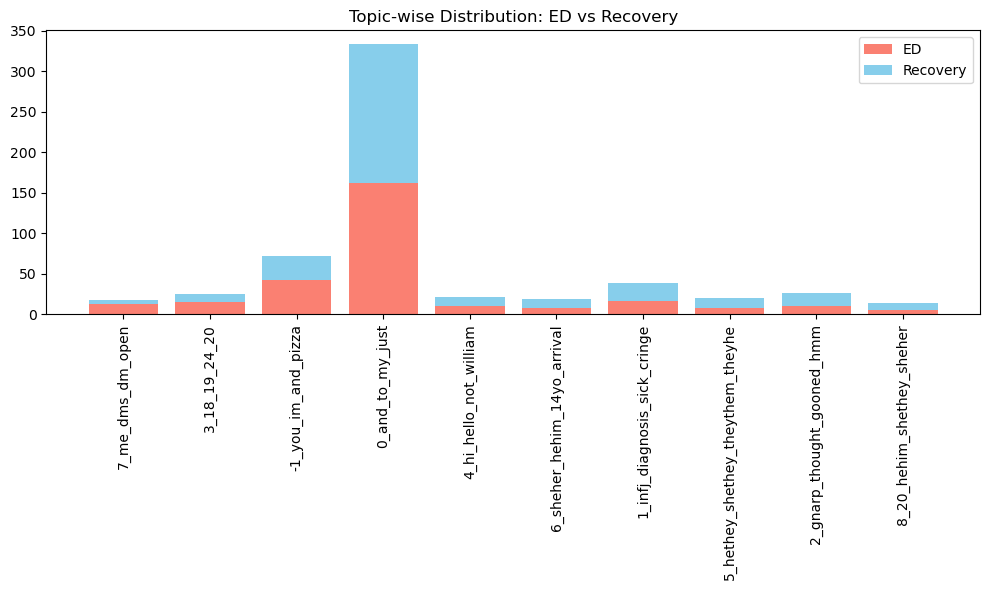

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

summary_df_sorted = summary_df.sort_values("ED_ratio", ascending=False)
plt.figure(figsize=(10,6))
plt.bar(summary_df_sorted["keywords"], summary_df_sorted["ED"], label='ED', color='salmon')
plt.bar(summary_df_sorted["keywords"], summary_df_sorted["Recovery"], bottom=summary_df_sorted["ED"], label='Recovery', color='skyblue')
plt.xticks(rotation=90)
plt.legend()
plt.title("Topic-wise Distribution: ED vs Recovery")
plt.tight_layout()
plt.show()

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("all-mpnet-base-v2")  # 或者 "paraphrase-MiniLM-L6-v2" 速度更快

docs = recover_profile_bio['bio_lemmatized'].dropna().tolist()

topic_model = BERTopic(embedding_model=embedding_model, language="english")
topics, probs = topic_model.fit_transform(docs)

topic_model.get_topic_info()
topic_model.visualize_topics()

In [51]:
topic_model.get_topic_info().head(10)

Topic  Count                           Name  \
0     -1     54  -1_dirty_syndicate_money_time   
1      0    186           0_time_miss_high_not   
2      1     23          1_she_they_he_awesome   
3      2     20               2_he_she_they_20   
4      3     16     3_tongue_area_goone_yippee   

                                      Representation  \
0  [dirty, syndicate, money, time, happy, girl, p...   
1  [time, miss, high, not, love, drunk, life, hea...   
2  [she, they, he, awesome, her, gooning, nokisse...   
3        [he, she, they, 20, 18, 22, uk, 19, 23, 26]   
4  [tongue, area, goone, yippee, yipeeee, wahaha,...   

                                 Representative_Docs  
0  [dirty money syndicate open lt 333, adult dirt...  
1  [average trans teenager venting life do not wo...  
2                       [she she, she they, he they]  
3               [18 she they, 20 he he, he he uk 18]  
4  [she she I m face tongue, silly stick tongue, ...

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer


embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  # 或者 "paraphrase-MiniLM-L6-v2" 速度更快


docs = ed_profile_bio['bio_lemmatized'].dropna().tolist()


topic_model = BERTopic(umap_model=None, embedding_model=embedding_model)
topics, probs = topic_model.fit_transform(docs)


topic_model.get_topic_info()
topic_model.get_topic_info().head(10)

Topic  Count                 Name  \
0      0    263  0_time_miss_she_not   
1      1     26   1_sp_rot_plop_lurk   

                                      Representation  \
0  [time, miss, she, not, love, high, drunk, they...   
1    [sp, rot, plop, lurk, infj, problem, yes, , , ]   

                                 Representative_Docs  
0  [not look friend drunk high acc use account th...  
1                          [lurk, plop, yes problem]

In [53]:
topic_model.get_topic_info().head(10)

Topic  Count                 Name  \
0      0    263  0_time_miss_she_not   
1      1     26   1_sp_rot_plop_lurk   

                                      Representation  \
0  [time, miss, she, not, love, high, drunk, they...   
1    [sp, rot, plop, lurk, infj, problem, yes, , , ]   

                                 Representative_Docs  
0  [not look friend drunk high acc use account th...  
1                          [lurk, plop, yes problem]

In [54]:
from bertopic import BERTopic

# Assuming you have the cleaned bios
docs = recover_profile_bio['bio_lemmatized'].dropna().tolist()

# Create BERTopic model
topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(docs)

# View top 10 topics
topic_model.get_topic_info().head(10)           # Top words for topic 0
#topic_model.visualize_topics()     # Interactive plot

Topic  Count                                     Name  \
0     -1      5  -1_photographer_intj_herzegovina_edrdit   
1      0    268                     0_time_miss_they_not   
2      1     26             1_yes_area_michigan_ouyhgghh   

                                      Representation  \
0  [photographer, intj, herzegovina, edrdit, dz, ...   
1  [time, miss, they, not, she, high, love, life,...   
2  [yes, area, michigan, ouyhgghh, goone, eekpeek...   

                                 Representative_Docs  
0  [dz vojam, czech american photographer, bosnia...  
1  [she they happy, gay man his half twenty love ...  
2        [yes problem, yes king, denver area yippee]

In [55]:
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

# Prepare embeddings
docs = recover_profile_bio['bio_lemmatized'].dropna().tolist()
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

# Try 5–10 clusters
kmeans_model = KMeans(n_clusters=6, random_state=42)

# Build BERTopic with KMeans
topic_model = BERTopic(
    language="english",
    calculate_probabilities=True,
    verbose=True,
    hdbscan_model=kmeans_model
)

topics, probs = topic_model.fit_transform(docs, embeddings)
topic_model.get_topic_info()

Batches: 100%|██████████| 10/10 [00:00<00:00, 43.61it/s]
2025-07-31 20:42:29,499 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-31 20:42:30,124 - BERTopic - Dimensionality - Completed ✓
2025-07-31 20:42:30,126 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
2025-07-31 20:42:30,580 - BERTopic - Cluster - Completed ✓
2025-07-31 20:42:30,583 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-31 20:42:30,611 - BERTopic - Representation - Completed ✓


Topic  Count                         Name  \
0      0     77       0_time_miss_high_drunk   
1      1     77    1_heart_love_time_rainbow   
2      2     50  2_not_information_love_time   
3      3     39            3_girl_20_they_he   
4      4     32    4_yes_yippie_infj_rooster   
5      5     24         5_she_they_he_female   

                                      Representation  \
0  [time, miss, high, drunk, life, not, money, tr...   
1  [heart, love, time, rainbow, sparkle, ribbon, ...   
2  [not, information, love, time, person, technol...   
3     [girl, 20, they, he, she, 18, 19, her, 14, uk]   
4  [yes, yippie, infj, rooster, photographer, ouy...   
5  [she, they, he, female, awesome, her, byeonhae...   

                                 Representative_Docs  
0  [try time find answer time life, I m writer dr...  
1  [make amp sell wire wrap crystal jewelry gem s...  
2  [23 year old fitness instructor try time make ...  
3   [girl, 18 she they, 20 something girl live life]  
4  [yes king, czech american photographer, denver...  
5                [he they, she they happy, she they]

In [56]:
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

# Prepare embeddings
docs = ed_profile_bio['bio_lemmatized'].dropna().tolist()
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

# Try 5–10 clusters
kmeans_model = KMeans(n_clusters=6, random_state=42)

# Build BERTopic with KMeans
topic_model = BERTopic(
    language="english",
    calculate_probabilities=True,
    verbose=True,
    hdbscan_model=kmeans_model
)

topics, probs = topic_model.fit_transform(docs, embeddings)
topic_model.get_topic_info()

Batches: 100%|██████████| 10/10 [00:00<00:00, 37.31it/s]
2025-07-31 20:42:32,621 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-31 20:42:33,419 - BERTopic - Dimensionality - Completed ✓
2025-07-31 20:42:33,420 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-31 20:42:33,426 - BERTopic - Cluster - Completed ✓
2025-07-31 20:42:33,428 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-31 20:42:33,439 - BERTopic - Representation - Completed ✓


Topic  Count                     Name  \
0      0     80  0_time_git_hole_sarcasm   
1      1     65   1_time_miss_high_drunk   
2      2     62   2_love_girl_heart_cool   
3      3     37      3_cat_18_20_sparkle   
4      4     26       4_sp_rot_plop_lurk   
5      5     19   5_she_they_he_bisexual   

                                      Representation  \
0  [time, git, hole, sarcasm, not, make, go, pizz...   
1  [time, miss, high, drunk, not, heart, dead, ac...   
2  [love, girl, heart, cool, her, she, happy, mus...   
3  [cat, 18, 20, sparkle, 23, guy, wale, gnarp, h...   
4    [sp, rot, plop, lurk, infj, problem, yes, , , ]   
5  [she, they, he, bisexual, btw, nova, voting, n...   

                                 Representative_Docs  
0  [he use time throwaway account t bring time de...  
1  [bpd want time pass away drunk high miss sleep...  
2  [isi she her author love fanfiction writer lov...  
3          [cat, f 23 sparkle, abacus cat black cat]  
4                            [plop, sp, yes problem]  
5                  [she they, they she he, they she]

In [57]:
# Assuming you have the cleaned bios
ed_docs = ed_profile_bio['bio_lemmatized'].dropna().tolist()

# Create BERTopic model
ed_topic_model = BERTopic()
topics, probs = ed_topic_model.fit_transform(ed_docs)

# View top 10 topics
ed_topic_model.get_topic_info().head(4)

Topic  Count                 Name  \
0      0    263  0_time_miss_she_not   
1      1     26   1_sp_rot_plop_lurk   

                                      Representation  \
0  [time, miss, she, not, love, high, drunk, they...   
1    [sp, rot, plop, lurk, infj, problem, yes, , , ]   

                                 Representative_Docs  
0  [not look friend drunk high acc use account th...  
1                          [lurk, plop, yes problem]

In [58]:
from bertopic import BERTopic
from hdbscan import HDBSCAN

# Create custom HDBSCAN model
hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples=1, cluster_selection_epsilon=0.1)

# Pass to BERTopic
ed_topic_model = BERTopic(hdbscan_model=hdbscan_model)
topics, probs = ed_topic_model.fit_transform(ed_docs)

ed_topic_model.get_topic_info().head(10)

Topic  Count                                    Name  \
0     -1     47                 -1_miss_love_laugh_time   
1      0     26                      0_sp_rot_plop_lurk   
2      1     21              1_git_time_need_disappoint   
3      2     21   2_account_hole_information_technology   
4      3     17                  3_cat_guy_gnarp_abacus   
5      4     15                         4_20_23_wale_18   
6      5     15             5_heart_pink_double_rainbow   
7      6     13              6_flower_wilt_disorder_bpd   
8      7      9            7_weird_normal_teenage_audhd   
9      8      9  8_tomography_personcompute_axial_tarot   

                                      Representation  \
0  [miss, love, laugh, time, reddit, put, long, d...   
1    [sp, rot, plop, lurk, infj, problem, yes, , , ]   
2  [git, time, need, disappoint, gang, thank, syn...   
3  [account, hole, information, technology, inter...   
4  [cat, guy, gnarp, abacus, actuallee, starveen,...   
5  [20, 23, wale, 18, 15, dms, interested, kangar...   
6  [heart, pink, double, rainbow, her, love, mino...   
7  [flower, wilt, disorder, bpd, patheticseasonal...   
8  [weird, normal, teenage, audhd, man, teenager,...   
9  [tomography, personcompute, axial, tarot, geek...   

                                 Representative_Docs  
0  [5 2 spicy enough time make love laugh miss jo...  
1                           [lurk, rot, yes problem]  
2  [ve division gang small fundraising page help ...  
3  [ventrilo internet chat program account 18, se...  
4  [cat amp pepsi max enthusiast, cat, abacus cat...  
5  [20 he they, happy end high explosive he 20, 2...  
6  [they they millennial law enforcement officer ...  
7  [depression obsession t mix wilt flower, I m t...  
8  [audhd mom weird interest, she her istp always...  
9  [I m author s note astrologer tarot reader t m...

#### NMF

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(recover_profile_bio['bio_lemmatized'].dropna())

nmf = NMF(n_components=10, random_state=42)
nmf.fit(X)

# View top words per topic
for idx, topic in enumerate(nmf.components_):
    print(f"Topic {idx}: ", [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 0:  ['wife', 'garzas', 'valeria', 'aziraphale', '20', 'lt', 'girlfriend', 'alright', 'awesome', 'they']
Topic 1:  ['thiiiiing', 'warning', 'flag', 'aziraphale', '18', 'female', 'uk', 'his', '20', 'he']
Topic 2:  ['live', 'successful', 'answer', 'well', 'find', 'git', 'navigate', 'try', 'time', 'life']
Topic 3:  ['intro', 'autistic', 'hand', '18', 'face', 'female', 'her', 'tongue', '22', 'she']
Topic 4:  ['cannabis', 'captainturnip', 'carrd', 'co', 'successful', 'online', 'vexillolophile', 'pronoun', 'throwaway', 'happy']
Topic 5:  ['life', 'annoying', 'teenage', 'club', 'silly', '20', 'bad', 'nightmare', 'live', 'girl']
Topic 6:  ['help', 'throwaway', 'information', 'name', 'see', 'time', 'account', 'drunk', 'high', 'miss']
Topic 7:  ['anime', 'time', 'person', 'sp', 'unpredictable', 'unexpected', 'day', 'one', 'goodbye', 'love']
Topic 8:  ['often', 'open', 'no', 'reddit', 'work', 'syndicate', 'dirty', 'money', 'do', 'not']
Topic 9:  ['cute', 'goofy', 'hand', 'black', 'red', 'fac

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Use your cleaned bios
texts = recover_profile_bio['bio_lemmatized'].dropna().tolist()

# Vectorize text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(texts)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)  # 10 topics
lda.fit(X)

# Print top words per topic
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"🟦 Topic #{topic_idx+1}: {' | '.join(top_features)}")

print_top_words(lda, vectorizer.get_feature_names_out())

🟦 Topic #1: happy | help | 18 | amp | lt | time | year | technology | world | money
🟦 Topic #2: reddit | anxiety | recovery | really | anorexia | fuck | health | female | issue | life
🟦 Topic #3: girl | face | high | love | time | drunk | unexpected | unpredictable | miss | money
🟦 Topic #4: miss | rainbow | high | heart | information | sparkle | life | skull | cake | drunk
🟦 Topic #5: miss | throwaway | time | face | yes | good | account | username | disorder | experience
🟦 Topic #6: time | life | heart | ribbon | git | try | red | health | autistic | self
🟦 Topic #7: 20 | person | miss | drunk | make | amp | high | sell | obsess | etsy
🟦 Topic #8: time | drunk | high | know | life | try | good | happy | cool | miss
🟦 Topic #9: love | miss | time | money | 20 | need | dirty | syndicate | dominate | gaming
🟦 Topic #10: time | miss | doesn | hand | direct | message | mind | 24 | heart | 23


In [61]:
from keybert import KeyBERT
kw_model = KeyBERT()

keywords = recover_profile_bio['bio'].dropna().apply(lambda x: kw_model.extract_keywords(x, top_n=5))

ModuleNotFoundError: No module named 'keybert'

#### zero-shot-classification

In [111]:
identity_labels = [
    "Self-Direction: Independent thought and action—choosing, creating, exploring",
    "Stimulation: Excitement, novelty, and challenge in life",
    "Hedonism: Pleasure and sensuous gratification for oneself",
    "Achievement: Personal success through demonstrating competence according to social standards",
    "Power: Social status and prestige, control or dominance over people and resources",
    "Security: Safety, harmony, and stability of society, of relationships, and of self",
    "Conformity: Restraint of actions, inclinations, and impulses likely to upset or harm others and violate social expectations or norms",
    "Tradition: Respect, commitment, and acceptance of the customs and ideas that traditional culture or religion provide",
    "Benevolence: Preserving and enhancing the welfare of those with whom one is in frequent personal contact",
    "Universalism: Understanding, appreciation, tolerance, and protection for the welfare of all people and for nature"
]
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")

Device set to use mps:0


In [118]:
from tqdm import tqdm
import pandas as pd

identity_labels = [
    "Age Identity", "Artist Identity", "Emotional Expression", "Gender/Sexual Identity",
    "Meme/Sarcasm", "Mental Health Aware", "Neurodivergent", "Recovery Focus",
    "Role Identity", "Spiritual", "Venting"
]

results = []

for i, row in tqdm(df.iterrows(), total=len(df), desc="Running zero-shot"):
    text = str(row['bio'])
    group = row['group']

    if not text.strip():
        continue

    try:
        result = classifier(text, identity_labels, multi_label=True)
        results.append({
            "group": group,
            "bio": text,
            **{label: score for label, score in zip(result["labels"], result["scores"])}
        })
    except Exception as e:
        print(f"⚠️ Skipped due to error: {e}")
        continue

identity_df = pd.DataFrame(results)

Running zero-shot: 100%|██████████| 588/588 [09:19<00:00,  1.05it/s]


In [117]:
save_path = "group_bios.csv"
df.to_csv(save_path, index=False)

In [ ]:
print(identity_df.head())

  group                                                bio  \
0    ED      i like mccafferty\n\nI am a certified geek \n   
1    ED                        hooorayyyyy!!!!!!!!!!!!!!!!   
2    ED                             Hi give me carats :3 ♡   
3    ED  18 🩰\n“insane, with long intervals of horrible...   
4    ED  maybe not all that well but honest and here to...   

   Emotional Expression  Gender/Sexual Identity  Mental Health Aware  \
0              0.805747                0.553716             0.058025   
1              0.958770                0.804002             0.222109   
2              0.846784                0.731346             0.189146   
3              0.796134                0.526982             0.127816   
4              0.673192                0.489748             0.268174   

   Spiritual  Meme/Sarcasm  Role Identity  Neurodivergent  Artist Identity  \
0   0.034881      0.029648       0.025131        0.020508         0.009908   
1   0.389314      0.139697       0.312

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# 按 group + identity_label 平均 score
melted_df = identity_df.melt(
    id_vars=["group", "bio"],
    value_vars=identity_labels,
    var_name="Identity_Label",
    value_name="Score"
)

avg_scores = melted_df.groupby(["group", "Identity_Label"])["Score"].mean().reset_index()
print(avg_scores.head(100))

       group          Identity_Label     Score
0         ED            Age Identity  0.244395
1         ED         Artist Identity  0.157928
2         ED    Emotional Expression  0.715043
3         ED  Gender/Sexual Identity  0.639924
4         ED            Meme/Sarcasm  0.163032
5         ED     Mental Health Aware  0.217596
6         ED          Neurodivergent  0.240271
7         ED          Recovery Focus  0.123781
8         ED           Role Identity  0.271284
9         ED               Spiritual  0.206843
10        ED                 Venting  0.200689
11  Recovery            Age Identity  0.237852
12  Recovery         Artist Identity  0.175324
13  Recovery    Emotional Expression  0.705475
14  Recovery  Gender/Sexual Identity  0.621830
15  Recovery            Meme/Sarcasm  0.137460
16  Recovery     Mental Health Aware  0.225047
17  Recovery          Neurodivergent  0.226334
18  Recovery          Recovery Focus  0.135789
19  Recovery           Role Identity  0.283456
20  Recovery 

In [122]:
from scipy.stats import ttest_ind, mannwhitneyu

test_results = []

for label in melted_df["Identity_Label"].unique():
    ed_scores = melted_df[(melted_df["group"] == "ED") & (melted_df["Identity_Label"] == label)]["Score"]
    rec_scores = melted_df[(melted_df["group"] == "Recovery") & (melted_df["Identity_Label"] == label)]["Score"]

    # t 检验
    t_stat, t_p = ttest_ind(ed_scores, rec_scores, equal_var=False)

    # 非参数 Mann-Whitney U 检验
    u_stat, u_p = mannwhitneyu(ed_scores, rec_scores, alternative='two-sided')

    test_results.append({
        "Identity_Label": label,
        "ED Mean": ed_scores.mean(),
        "Recovery Mean": rec_scores.mean(),
        "t-test p": t_p,
        "Mann-Whitney p": u_p
    })

# 汇总结果
test_df = pd.DataFrame(test_results)
test_df["Significant (p<.05)"] = test_df["t-test p"] < 0.05
test_df = test_df.sort_values("t-test p")

# 查看结果
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=test_df, x="Identity_Label", y="ED Mean", color="red", label="ED")
sns.barplot(data=test_df, x="Identity_Label", y="Recovery Mean", color="blue", label="Recovery", alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.title("Identity Label Scores by Group")
plt.tight_layout()
plt.show()

In [123]:
print(test_df)

            Identity_Label   ED Mean  Recovery Mean  t-test p  Mann-Whitney p  \
4             Meme/Sarcasm  0.163032       0.137460  0.087795        0.078927   
9                Spiritual  0.206843       0.237603  0.137512        0.623042   
1          Artist Identity  0.157928       0.175324  0.255391        0.715860   
7           Recovery Focus  0.123781       0.135789  0.371009        0.464218   
6           Neurodivergent  0.240271       0.226334  0.408265        0.403753   
3   Gender/Sexual Identity  0.639924       0.621830  0.434534        0.675260   
8            Role Identity  0.271284       0.283456  0.435745        0.581029   
10                 Venting  0.200689       0.187907  0.441985        0.978279   
5      Mental Health Aware  0.217596       0.225047  0.620948        0.844818   
2     Emotional Expression  0.715043       0.705475  0.669166        0.709825   
0             Age Identity  0.244395       0.237852  0.796642        0.763071   

    Significant (p<.05)  
4

In [ ]:
labels = ["Connectedness", "Hope and Optimism", "Identity", "Meaning in Life", "Empowerment"]
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

for bio in recover_profile_bio['bio_lemmatized'].dropna().head(5):
    result = classifier(bio, candidate_labels=labels)
    print(f"\n🔍 Bio: {bio}")
    for label, score in zip(result["labels"], result["scores"]):
        print(f"  {label}: {score:.2f}")

Device set to use mps:0



🔍 Bio: I m try time well
  Meaning in Life: 0.33
  Connectedness: 0.21
  Hope and Optimism: 0.20
  Empowerment: 0.16
  Identity: 0.10

🔍 Bio: 16 subhuman retard future ropemaxxer
  Connectedness: 0.43
  Meaning in Life: 0.27
  Identity: 0.16
  Empowerment: 0.11
  Hope and Optimism: 0.03

🔍 Bio: clink glass
  Meaning in Life: 0.35
  Connectedness: 0.29
  Hope and Optimism: 0.17
  Empowerment: 0.12
  Identity: 0.06

🔍 Bio: not honest time share experience
  Connectedness: 0.46
  Meaning in Life: 0.20
  Identity: 0.19
  Empowerment: 0.11
  Hope and Optimism: 0.05

🔍 Bio: exist find information technology nauseating jean paul sartre they they millenial gamer animal lover people hater anarchist depressed anxious high functioning autistic that s
  Meaning in Life: 0.35
  Identity: 0.26
  Empowerment: 0.24
  Connectedness: 0.13
  Hope and Optimism: 0.02


In [ ]:
from transformers import pipeline
from tqdm import tqdm
import pandas as pd

# Remove empty or whitespace-only bios
bios = recover_profile_bio['bio_lemmatized'].dropna()
bios = bios[bios.str.strip() != ''].tolist()

# Define topic labels
topic_labels = ["Self-Direction",
    "Stimulation",
    "Hedonism",
    "Achievement",
    "Power",
    "Security",
    "Conformity",
    "Tradition",
    "Benevolence",
    "Universalism"]

# Load zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Store results
all_scores = []

# Process each bio safely
for bio in tqdm(bios, desc="Classifying bios"):
    try:
        result = classifier(bio, candidate_labels=topic_labels)
        scores = dict(zip(result['labels'], result['scores']))
        scores['bio'] = bio
        all_scores.append(scores)
    except Exception as e:
        print(f"⚠️ Skipped bio due to error: {e}")
        continue

# Convert to DataFrame
df_scores = pd.DataFrame(all_scores)

# Show average topic scores
print("\n📊 Average topic relevance scores:")
print(df_scores[topic_labels].mean().sort_values(ascending=False))

Device set to use mps:0
Classifying bios: 100%|██████████| 291/291 [03:53<00:00,  1.25it/s]


📊 Average topic relevance scores:
Benevolence       0.162687
Self-Direction    0.153490
Conformity        0.133831
Stimulation       0.123907
Power             0.114622
Achievement       0.097335
Hedonism          0.070775
Tradition         0.058773
Security          0.045953
Universalism      0.038627
dtype: float64


In [ ]:

# Remove empty or whitespace-only bios
bios = ed_profile_bio['bio_lemmatized'].dropna()
bios = bios[bios.str.strip() != ''].tolist()

# Define topic labels
topic_labels = ["Self-Direction",
    "Stimulation",
    "Hedonism",
    "Achievement",
    "Power",
    "Security",
    "Conformity",
    "Tradition",
    "Benevolence",
    "Universalism"]

# Load zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Store results
all_scores = []

# Process each bio safely
for bio in tqdm(bios, desc="Classifying bios"):
    try:
        result = classifier(bio, candidate_labels=topic_labels)
        scores = dict(zip(result['labels'], result['scores']))
        scores['bio'] = bio
        all_scores.append(scores)
    except Exception as e:
        print(f"⚠️ Skipped bio due to error: {e}")
        continue

# Convert to DataFrame
df_scores = pd.DataFrame(all_scores)

# Show average topic scores
print("\n📊 Average topic relevance scores:")
print(df_scores[topic_labels].mean().sort_values(ascending=False))

Device set to use mps:0
Classifying bios: 100%|██████████| 269/269 [03:45<00:00,  1.19it/s]


📊 Average topic relevance scores:
Benevolence       0.162158
Self-Direction    0.154419
Conformity        0.140416
Stimulation       0.132251
Power             0.116741
Achievement       0.086050
Hedonism          0.071407
Tradition         0.049490
Security          0.048910
Universalism      0.038159
dtype: float64


In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import torch

# Load embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode bios and labels
bio_embeddings = model.encode(bios, convert_to_tensor=True)
label_embeddings = model.encode(topic_labels, convert_to_tensor=True)

# Compute cosine similarity
similarities = util.cos_sim(bio_embeddings, label_embeddings)
top_indices = torch.argmax(similarities, dim=1)
top_scores = torch.max(similarities, dim=1).values

# Format output
df = pd.DataFrame({
    "bio": bios,
    "predicted_label": [labels[i] for i in top_indices],
    "similarity": top_scores.tolist()
})
print(df.head())

                                                 bio predicted_label  \
0  introduction quote mccafferty ante meridiem mi...        Identity   
1                                        hooorayyyyy        Identity   
2                         give carat cute goofy face        Identity   
3  18 ballet shoe insane long interval horrible s...        Identity   
4                   not honest time share experience        Identity   

   similarity  
0    0.136471  
1    0.197743  
2    0.152329  
3    0.084106  
4    0.163705  


In [ ]:
# Embed all
bio_embeddings = model.encode(bios, convert_to_tensor=True)
label_embeddings = model.encode(topic_labels, convert_to_tensor=True)

# Compute similarity
import torch
scores = util.cos_sim(bio_embeddings, label_embeddings)

# Assign top label for each bio
top_indices = torch.argmax(scores, dim=1)
labels = [topic_labels[i] for i in top_indices]

tensor([[-0.0059,  0.1180,  0.1140,  0.1365,  0.1161],
        [ 0.1706,  0.1953,  0.1747,  0.1977,  0.1698],
        [ 0.0457,  0.0991,  0.1523,  0.1222,  0.0684],
        ...,
        [ 0.0860,  0.0801,  0.1522,  0.0743,  0.1741],
        [ 0.0866,  0.1088,  0.1465,  0.1139,  0.1036],
        [ 0.1389,  0.1402,  0.1372,  0.0935,  0.1252]], device='mps:0')


#### GSDMM

In [ ]:
# Drop missing values
ed_docs = ed_profile_bio['bio_lemmatized'].dropna().tolist()
recover_docs = recover_profile_bio['bio_lemmatized'].dropna().tolist()

In [ ]:
from collections import Counter

def get_top_words(mgp, topic, top_n=10):
    """Get top n words for a given topic from word distributions."""
    word_counts = mgp.cluster_word_distribution[topic]
    return Counter(word_counts).most_common(top_n)

def run_gsdmm(docs, K=10):
    tokenized_docs = [doc.split() for doc in docs]
    vocab = set(word for doc in tokenized_docs for word in doc)

    mgp = MovieGroupProcess(K=K, alpha=0.1, beta=0.3, n_iters=30)
    mgp.fit(tokenized_docs, len(vocab))

    for topic in range(K):
        if mgp.cluster_doc_count[topic] > 0:
            print(f"\n🔹 Topic {topic} (size={mgp.cluster_doc_count[topic]}):")
            top_words = get_top_words(mgp, topic)
            print([f"{word} ({count})" for word, count in top_words])


print("===== GSDMM for ED users =====")
run_gsdmm(ed_docs, K=6)

print("\n===== GSDMM for Recovery users =====")
run_gsdmm(recover_docs, K=6)

===== GSDMM for ED users =====
In stage 0: transferred 219 clusters with 6 clusters populated
In stage 1: transferred 128 clusters with 6 clusters populated
In stage 2: transferred 109 clusters with 6 clusters populated
In stage 3: transferred 109 clusters with 6 clusters populated
In stage 4: transferred 118 clusters with 6 clusters populated
In stage 5: transferred 107 clusters with 6 clusters populated
In stage 6: transferred 100 clusters with 6 clusters populated
In stage 7: transferred 94 clusters with 6 clusters populated
In stage 8: transferred 112 clusters with 6 clusters populated
In stage 9: transferred 106 clusters with 6 clusters populated
In stage 10: transferred 101 clusters with 6 clusters populated
In stage 11: transferred 107 clusters with 6 clusters populated
In stage 12: transferred 85 clusters with 6 clusters populated
In stage 13: transferred 92 clusters with 6 clusters populated
In stage 14: transferred 98 clusters with 6 clusters populated
In stage 15: transferre

#### Few shot cliassifcation

In [ ]:
import pandas as pd
import ast

df = pd.read_csv("group_bios.csv")

def to_list(x):
    if isinstance(x, str):
        try:
            parsed = ast.literal_eval(x)
            return parsed if isinstance(parsed, list) else [parsed]
        except:
            return [x.strip()]
    else:
        return []

df['identity_labels'] = df['identity_labels'].apply(to_list)


print(df[['bio', 'identity_labels']].head())

                                                 bio  \
0      i like mccafferty\n\nI am a certified geek \n   
1                        hooorayyyyy!!!!!!!!!!!!!!!!   
2                             Hi give me carats :3 ♡   
3  18 �\n“insane, with long intervals of horrible...   
4  maybe not all that well but honest and here to...   

                          identity_labels  
0                                      []  
1                          [Meme/Sarcasm]  
2                                      []  
3  [Age Identity, Gender/Sexual Identity]  
4                                      []  


In [ ]:

df["label_str"] = df["identity_labels"].apply(lambda x: ",".join(sorted(x)))

fewshot_df = df.groupby("label_str", group_keys=False).head(10).reset_index(drop=True)

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("paraphrase-mpnet-base-v2") 
X_embeddings = model.encode(fewshot_df["bio"].tolist(), show_progress_bar=True)

Batches: 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(fewshot_df["identity_labels"])

clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
clf.fit(X_embeddings, y)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [ ]:
def predict_labels(texts):
    embeddings = model.encode(texts)
    probs = clf.predict_proba(embeddings)
    threshold = 0.5
    preds = (probs >= threshold).astype(int)
    return mlb.inverse_transform(preds)

test_bios = [
    "queer neurodivergent 16 y/o who loves art and stars",
    "I believe in God, crystals, and vibes. Healing every day 🌙✨"
]
print(predict_labels(test_bios))

[(), ('Spiritual',)]


In [282]:
df["predicted_labels"] = predict_labels(df["bio"].tolist())

In [ ]:
from sklearn.metrics import classification_report


y_true = mlb.transform(df["identity_labels"])  
y_pred = mlb.transform(df["predicted_labels"])  

print(classification_report(y_true, y_pred, target_names=mlb.classes_))

                        precision    recall  f1-score   support

          Age Identity       0.36      0.80      0.50        10
       Artist Identity       0.69      0.90      0.78        10
  Emotional Expression       1.00      0.90      0.95        10
Gender/Sexual Identity       0.27      0.85      0.41        13
          Meme/Sarcasm       0.56      1.00      0.71        10
   Mental Health Aware       0.83      0.83      0.83        12
        Neurodivergent       1.00      0.89      0.94         9
        Recovery Focus       0.91      1.00      0.95        10
         Role Identity       1.00      0.91      0.95        11
             Spiritual       0.83      0.83      0.83        12
               Venting       0.90      0.82      0.86        11

             micro avg       0.63      0.88      0.73       118
             macro avg       0.76      0.88      0.79       118
          weighted avg       0.75      0.88      0.79       118
           samples avg       0.15     

In [284]:
from sklearn.metrics import hamming_loss, f1_score

y_true = mlb.transform(df["identity_labels"])
y_pred = mlb.transform(df["predicted_labels"])

print("Hamming Loss:", hamming_loss(y_true, y_pred))
print("Micro F1:", f1_score(y_true, y_pred, average="micro"))
print("Macro F1:", f1_score(y_true, y_pred, average="macro"))

Hamming Loss: 0.011750154607297465
Micro F1: 0.7323943661971831
Macro F1: 0.7928561943234173


In [ ]:
import pandas as pd

def predict_label_scores(texts):
    embeddings = model.encode(texts)
    probs = clf.predict_proba(embeddings)  # shape: (n_texts, n_labels)
    label_names = mlb.classes_
    
    results = []
    for prob_row in probs:
        label_score_dict = {label: float(score) for label, score in zip(label_names, prob_row)}
        results.append(label_score_dict)
    return results


label_scores = predict_label_scores(df["bio"].tolist())  # 这是前面定义的函数
label_scores_df = pd.DataFrame(label_scores)  


df_scores = pd.concat([df[["group"]].reset_index(drop=True), label_scores_df], axis=1)


group_means = df_scores.groupby("group").mean()


print(group_means.head())

          Age Identity  Artist Identity  Emotional Expression  \
group                                                           
ED            0.082039         0.055467              0.060605   
Recovery      0.064880         0.069636              0.047457   

          Gender/Sexual Identity  Meme/Sarcasm  Mental Health Aware  \
group                                                                 
ED                      0.094889      0.096757             0.067706   
Recovery                0.112169      0.090043             0.059431   

          Neurodivergent  Recovery Focus  Role Identity  Spiritual   Venting  
group                                                                         
ED              0.049177        0.048214       0.073226   0.086011  0.075911  
Recovery        0.041187        0.054304       0.078198   0.094619  0.064869  


In [ ]:
from scipy.stats import ttest_ind

results = []

for label in label_scores_df.columns:
    ed_scores = df_scores[df_scores["group"] == "ED"][label]
    recovery_scores = df_scores[df_scores["group"] == "Recovery"][label]

    t_stat, p_val = ttest_ind(ed_scores, recovery_scores, equal_var=False)
    u_stat, wt_p_val = mannwhitneyu(ed_scores, recovery_scores, alternative='less')


    results.append({
        "label": label,
        "ED_mean": ed_scores.mean(),
        "Recovery_mean": recovery_scores.mean(),
        "t_stat": t_stat,
        "p_value": p_val,
        "mannwhitneyu_stat": u_stat,
        "mannwhitneyu_p_value": wt_p_val
    })

results_df = pd.DataFrame(results)
results_df["significant"] = results_df["p_value"] < 0.05
results_df = results_df.sort_values("p_value")

print(results_df.head(10))  

                     label   ED_mean  Recovery_mean    t_stat   p_value  \
2     Emotional Expression  0.060605       0.047457  1.819344  0.069574   
1          Artist Identity  0.055467       0.069636 -1.713883  0.087101   
0             Age Identity  0.082039       0.064880  1.528712  0.126922   
10                 Venting  0.075911       0.064869  1.346175  0.178815   
6           Neurodivergent  0.049177       0.041187  1.206500  0.228214   
3   Gender/Sexual Identity  0.094889       0.112169 -1.087094  0.277445   
5      Mental Health Aware  0.067706       0.059431  0.943196  0.345996   
9                Spiritual  0.086011       0.094619 -0.918391  0.358792   
7           Recovery Focus  0.048214       0.054304 -0.700378  0.483974   
8            Role Identity  0.073226       0.078198 -0.634650  0.525905   

    mannwhitneyu_stat  mannwhitneyu_p_value  significant  
2             43809.0              0.615347        False  
1             40401.0              0.086673        False

In [301]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    if not isinstance(text, str):
        return 0.0
    return analyzer.polarity_scores(text)["compound"]

df["sentiment_score"] = df["bio"].apply(get_sentiment_score)

In [ ]:
from scipy.stats import mannwhitneyu

results = []

exploded_df = df.explode("predicted_labels").dropna(subset=["predicted_labels", "group"])


for label, group_df in exploded_df.groupby("predicted_labels"):
    ed_scores = group_df[group_df["group"] == "ED"]["sentiment_score"]
    rec_scores = group_df[group_df["group"] == "Recovery"]["sentiment_score"]

    ed_scores = pd.to_numeric(ed_scores, errors="coerce").dropna().astype(float)
    rec_scores = pd.to_numeric(rec_scores, errors="coerce").dropna().astype(float)

    if len(ed_scores) > 1 and len(rec_scores) > 1:
        t_stat, p_val = mannwhitneyu(ed_scores, rec_scores, alternative="less")
        results.append({
            "label": label,
            "ed_mean": ed_scores.mean(),
            "rec_mean": rec_scores.mean(),
            "mean_diff": rec_scores.mean() - ed_scores.mean(),
            "p_value": p_val,
            "ed_n": len(ed_scores),
            "rec_n": len(rec_scores)
        })

results_df = pd.DataFrame(results).sort_values("p_value")
print(results_df.head(10))  

                    label   ed_mean  rec_mean  mean_diff   p_value  ed_n  \
9                 Venting -0.062067  0.311025   0.373092  0.015319     6   
5          Neurodivergent -0.140767  0.012900   0.153667  0.321429     6   
0            Age Identity -0.016733  0.000000   0.016733  0.361564    15   
4     Mental Health Aware -0.062863 -0.106975  -0.044112  0.366598     8   
2  Gender/Sexual Identity  0.013641  0.045250   0.031609  0.398966    17   
7           Role Identity  0.045867  0.044475  -0.001392  0.595269     6   
3            Meme/Sarcasm  0.034210  0.010462  -0.023748  0.673704    10   
1         Artist Identity  0.180020  0.094225  -0.085795  0.734270     5   
8               Spiritual  0.410200  0.178300  -0.231900  0.815012     6   
6          Recovery Focus  0.308860  0.006200  -0.302660  0.846829     5   

   rec_n  
9      4  
5      2  
0      7  
4      4  
2     24  
7      4  
3      8  
1      8  
8      6  
6      6  


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re
from wordcloud import STOPWORDS


custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    "time", "amp", "just", "like", "get", "im", "dont", "got", "one", "thing",
    "know", "really", "still", "even", "going", "make", "much", "well", "yeah",
    "t", "m","miss","love","face","drunk","high","account","git","s", "f","hole","name","username","hi","sheher","dm","hello","heart","u","dms","acc","reddit",
    "im", "youre", "theyre", "hes", "shes", "were", "its", "thats", "whats","want","need","loves","lover","lot","yo","always","lt","things","wont","cant","pls","idk","isnt",
    "now","year"])

def clean_bio(text):
    text = re.sub(r"http\S+|www\S+|@\w+", "", text)  
    text = re.sub(r"[^a-zA-Z\s]", "", text)          
    text = text.lower()                              
    tokens = text.split()
    tokens = [word for word in tokens if word not in custom_stopwords]
    return " ".join(tokens)


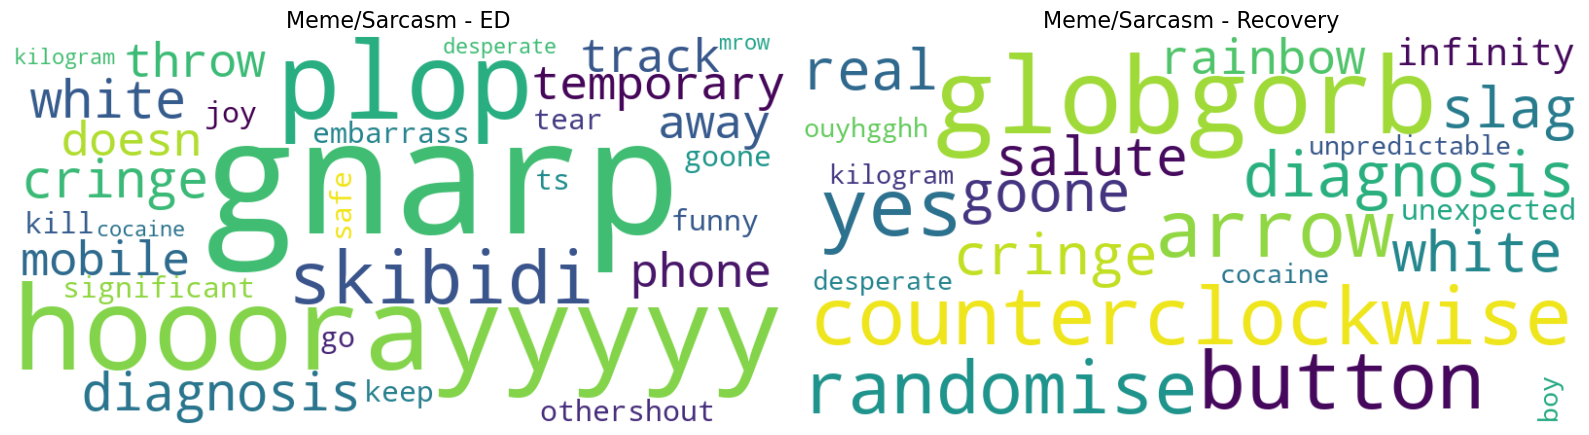

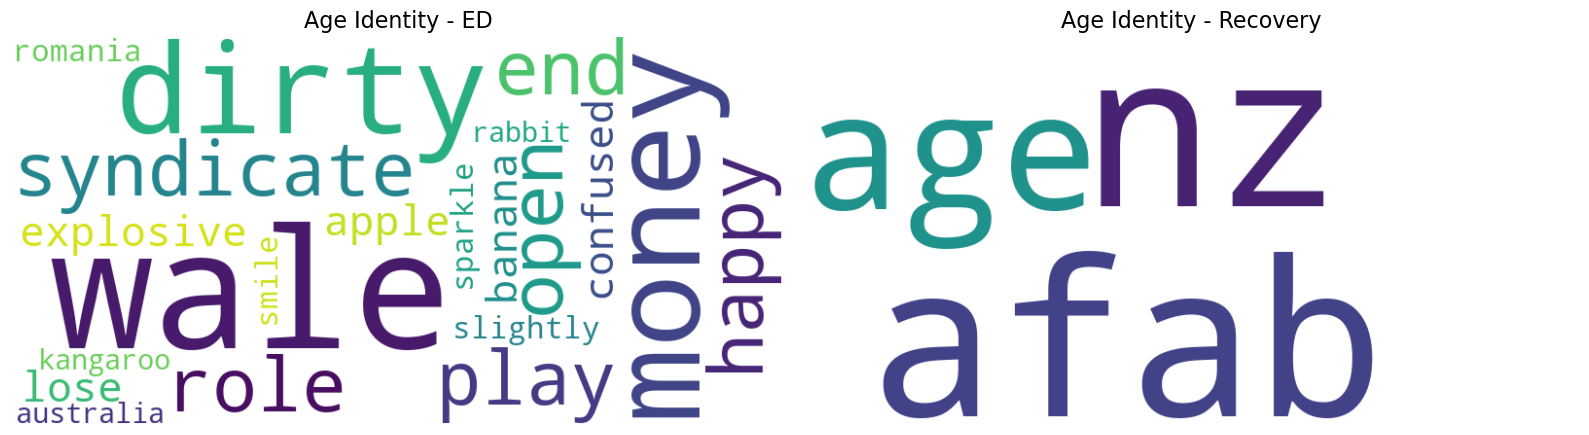

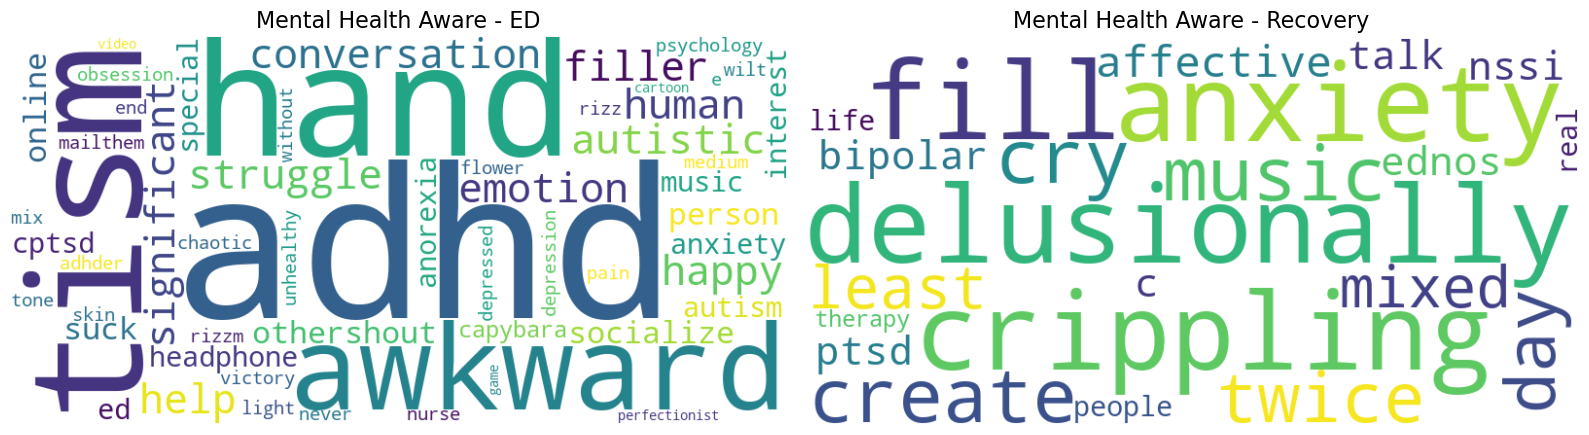

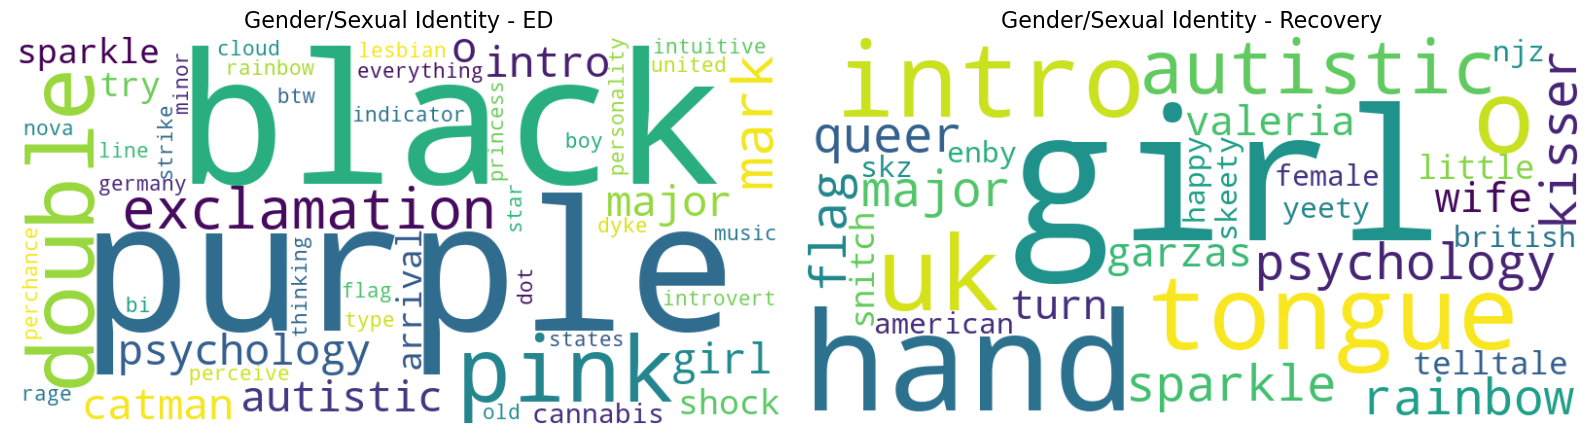

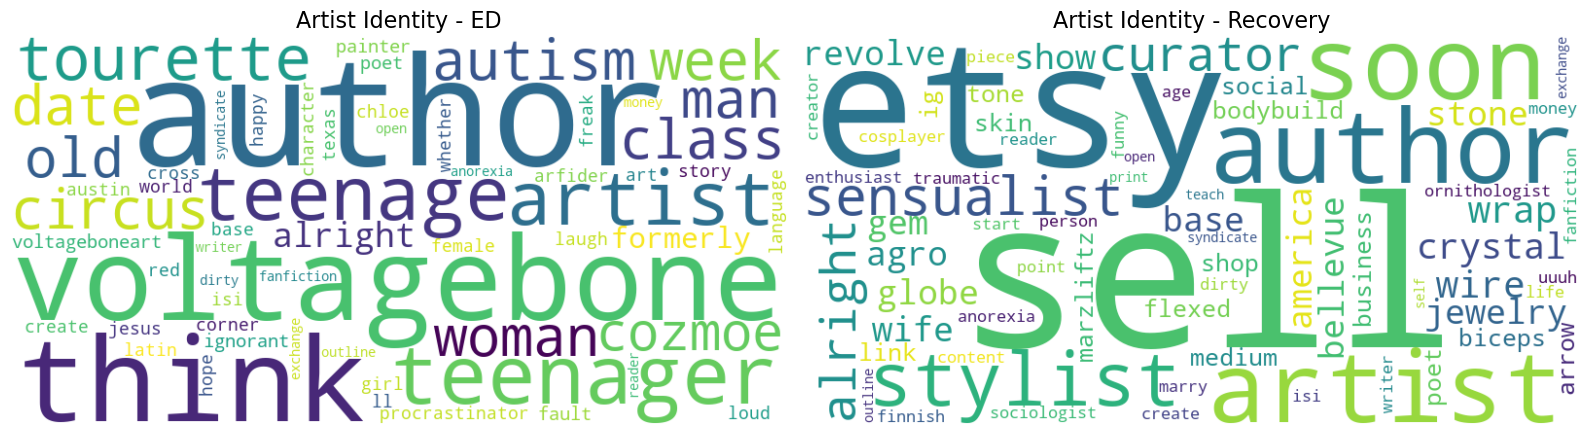

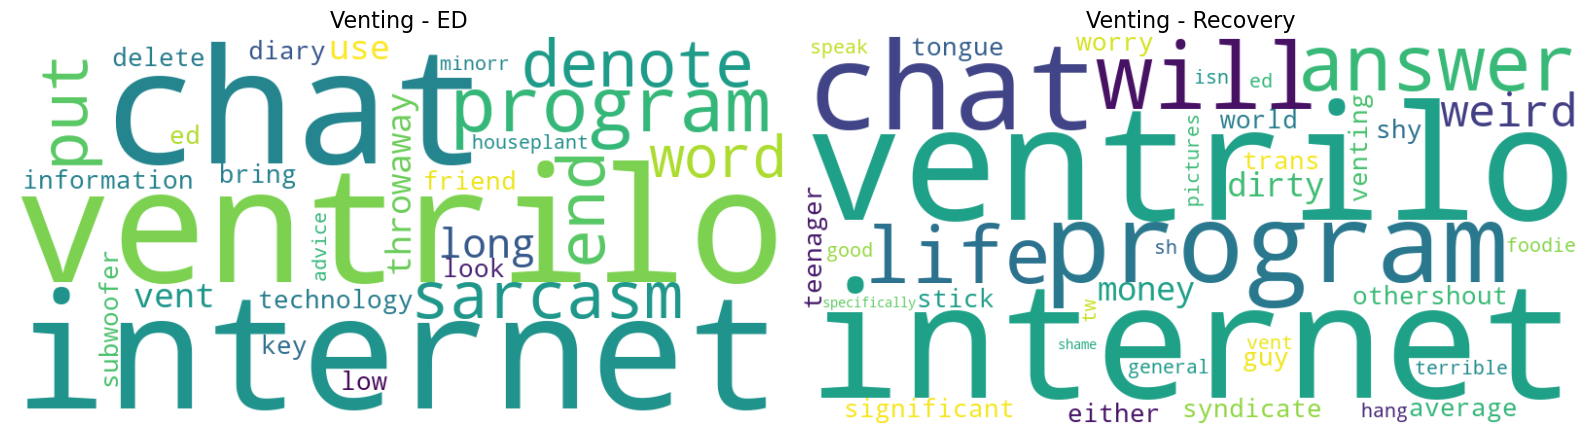

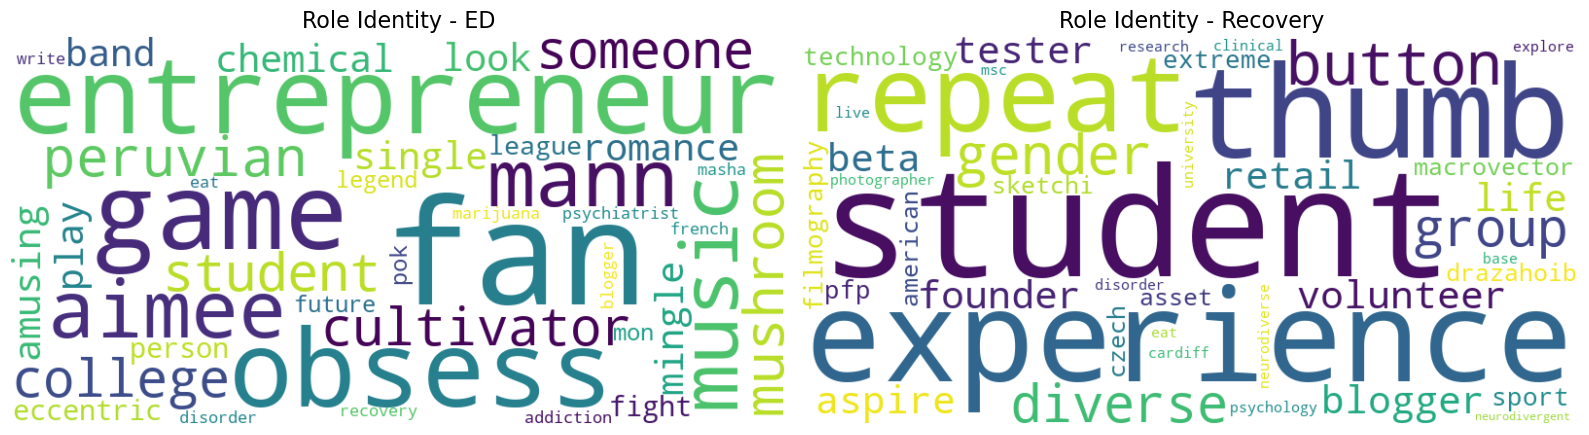

In [ ]:

exploded_df = df.explode("predicted_labels").dropna(subset=["predicted_labels", "bio", "group"])
exploded_df["bio_clean"] = exploded_df["bio_lemmatized"].fillna("").apply(clean_bio)


unique_labels = exploded_df["predicted_labels"].unique()

for label in unique_labels:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    
    for i, group in enumerate(["ED", "Recovery"]):
        text = " ".join(
            exploded_df[
                (exploded_df["predicted_labels"] == label) &
                (exploded_df["group"] == group)
            ]["bio_clean"].dropna().tolist()
        )
        
        if not text.strip():
            continue  # 如果该群体该标签下没内容，就跳过

        wordcloud = WordCloud(
            width=800, height=400,
            background_color='white',
            max_words=100,
            collocations=True
        ).generate(text)

        axs[i].imshow(wordcloud, interpolation="bilinear")
        axs[i].axis("off")
        axs[i].set_title(f"{label} - {group}", fontsize=16)

    plt.tight_layout()
    plt.show()

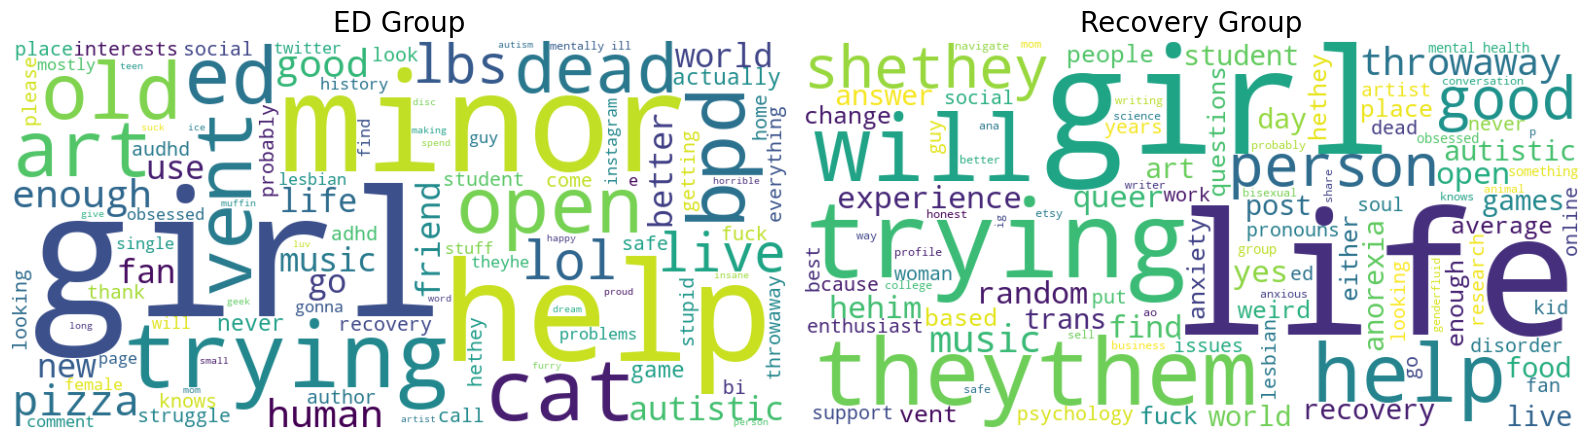

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re


ed_text = " ".join(df[df["group"] == "ED"]["bio"].dropna().map(clean_bio))
rec_text = " ".join(df[df["group"] == "Recovery"]["bio"].dropna().map(clean_bio))


wordcloud_ed = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(ed_text)
wordcloud_rec = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(rec_text)


plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_ed, interpolation='bilinear')
plt.axis("off")
plt.title("ED Group", fontsize=20)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_rec, interpolation='bilinear')
plt.axis("off")
plt.title("Recovery Group", fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter


ed_words = ed_text.split()
rec_words = rec_text.split()

ed_freq = Counter(ed_words)
rec_freq = Counter(rec_words)


print("Top ED words:", ed_freq.most_common(20))
print("Top Recovery words:", rec_freq.most_common(20))

Top ED words: [('girl', 11), ('help', 7), ('minor', 7), ('trying', 7), ('open', 5), ('bpd', 5), ('art', 5), ('vent', 5), ('old', 5), ('dead', 5), ('live', 5), ('lol', 5), ('lbs', 5), ('pizza', 5), ('ed', 4), ('enough', 4), ('human', 4), ('good', 4), ('autistic', 4), ('music', 4)]
Top Recovery words: [('life', 18), ('girl', 13), ('trying', 10), ('theythem', 8), ('will', 8), ('help', 6), ('shethey', 6), ('person', 6), ('good', 6), ('throwaway', 6), ('music', 6), ('find', 5), ('hehim', 5), ('yes', 5), ('queer', 5), ('open', 5), ('random', 5), ('health', 5), ('autistic', 4), ('food', 4)]
